
# 项目：过去几年相机价格、尺寸规格和容量的变化

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在这一段报告中对你选择进行分析的数据集进行简要介绍。在本段末尾，对你计划在报告过程中探索的问题进行描述。自己尝试建立至少一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，务必熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。
- 这是一个关于相机的数据，里面有各种型号相机的出厂日期，价格对焦和分辨率等数据。
- 数据是来自于[kaggle网站的datasets](https://www.kaggle.com/crawford/1000-cameras-dataset/data)  
1.相机的价格是否会随着相机的出厂日期增加而增大，价格的时间分布是什么样的？  
2.相机存储容量的分布，尺寸规格和出厂日期有关系，如果有关系它们是什么样的趋势？ 

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

In [612]:
# 用这个框对你计划使用的所有数据包设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

% matplotlib inline

# 务必包含一个‘咒语’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问这个网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

camera = pd.read_csv('camera_dataset.csv')

<a id='wrangling'></a>
## 数据整理

> **提示**：在这一段报告中载入数据，检查简洁度，然后整理和清理数据集，以进行分析。务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [613]:
### 首先查看数据集都有哪些字段
display(camera.head(1))

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0


In [614]:
### 查看数据集中有没有缺失值，如果有，有多少
display(camera.isnull().any().any())
display(camera.isnull().sum().sum())
display(camera.isnull().sum())
### "Macro focus range" 有一个 Nan
### "Storage included" 有两个 Nan
### "Weight (inc. batteries)" 有两个 Nan
### "Dimensions" 有两个 Nan

True

7

Model                      0
Release date               0
Max resolution             0
Low resolution             0
Effective pixels           0
Zoom wide (W)              0
Zoom tele (T)              0
Normal focus range         0
Macro focus range          1
Storage included           2
Weight (inc. batteries)    2
Dimensions                 2
Price                      0
dtype: int64

In [615]:
### 查看数据集中是否有冗余数据，如果有，有多少
display(camera.duplicated().sum())   ### 没有重复数据

0

In [616]:
### 查看数据集的数据类型是否正确
display(camera.info())
### 查看下这个Release date具体是什么类型
display(camera['Release date'][0])
display(type(camera['Release date'][0]))
### 根据对数据的评估接下来需要把一些不用的字段清理掉，然后把缺失值删掉，因为缺失的数据量并不大，不会影响最后的结果

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 13 columns):
Model                      1038 non-null object
Release date               1038 non-null int64
Max resolution             1038 non-null float64
Low resolution             1038 non-null float64
Effective pixels           1038 non-null float64
Zoom wide (W)              1038 non-null float64
Zoom tele (T)              1038 non-null float64
Normal focus range         1038 non-null float64
Macro focus range          1037 non-null float64
Storage included           1036 non-null float64
Weight (inc. batteries)    1036 non-null float64
Dimensions                 1036 non-null float64
Price                      1038 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 105.5+ KB


None

1997

numpy.int64

> **提示**：_不应_在每个框中进行太多操作。可以自由创建框，进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索操作。不要求对其进行组织，但务必仔细阅读备注，理解每个代码框的用途。完成分析之后，可以创建 notebook 副本，在其中去除多余数据，组织步骤，从而形成结构连贯、紧密的报告。

> **提示**：务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。尽量做到这一点，以便读者理解后续框中的内容。

### 清理不需要的数据
### 把所有的字段转化成方便操作的字段
### 把缺失值删掉

In [617]:
# 讨论数据结构和需要解决的任何问题之后，
#   在本段的第二部分进行这些清理步骤。
### 首先清理不需要的字段
camera.drop(['Model', 'Max resolution', 'Low resolution', 'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)', 'Normal focus range', 'Macro focus range', 'Weight (inc. batteries)'], axis=1, inplace=True)

In [618]:
### 然后把所有的数据转换为小写并把空格换成‘_’
camera.rename(columns=lambda x:x.strip().lower().replace(' (', '_').replace('. ', '_').replace(' ', '_').replace(')', ''), inplace=True)

In [619]:
### 查看字段是否修改成功
camera.head(1)

,release_date,storage_included,dimensions,price
0,1997,4.0,95.0,179.0


In [620]:
### 再次查看需要使用的数据中有多少缺失值

camera.isnull().sum()

release_date        0
storage_included    2
dimensions          2
price               0
dtype: int64

In [621]:
### 把数据中的缺失值删掉，因为缺失值数量并不大，不会影响结果
camera.dropna(inplace=True)

In [622]:
### 查看是否成功删除缺失值
camera.isnull().sum()

release_date        0
storage_included    0
dimensions          0
price               0
dtype: int64

In [623]:
def draw_box(column='', xlabels='Camera\' release data(Year)', ylabels='', title=''):
    """画箱线图"""
    camera.boxplot(column=column, by='release_date', showfliers=False)
    plt.xlabel(xlabels, fontsize=16)
    plt.ylabel(ylabels, fontsize=16)
    plt.title(title, fontsize=16)
    plt.legend()

<a id='eda'></a>
## 探索性数据分析

> **提示**：整理和清理数据之后，现在可以进行探索。计算统计值，创建视图，解决你在简介段提出的研究问题。建议采用系统化方法。一次探索一个变量，然后探索变量之间的关系。

### 1.相机的价格是否会随着相机的出厂日期增加而增加，价格的时间分布是什么样的？

D:\Python\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


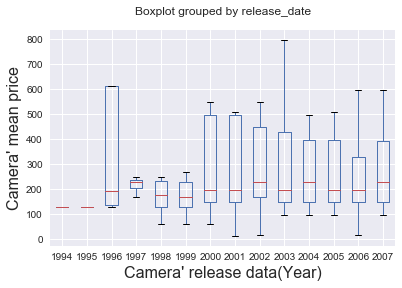

In [624]:
### 先来看看每年价格升降的趋势
draw_box('price', ylabels='Camera\' mean price')

- 从箱线图中可以看到前几年的数据有异常，所以需要查看每一年的数据量

In [625]:
camera.groupby('release_date').count()

,storage_included,dimensions,price
release_date,,,
1994,1,1,1
1995,1,1,1
1996,4,4,4
1997,11,11,11
1998,32,32,32
1999,53,53,53
2000,61,61,61
2001,85,85,85
2002,89,89,89


- 通过观察，发现前几年数据，数据量太小所以需要清理，因为前几年数据量太少很难说明问题

In [626]:
### 获取数据量高于100的年份的数据集
camera = camera[camera.release_date > 2003]

D:\Python\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


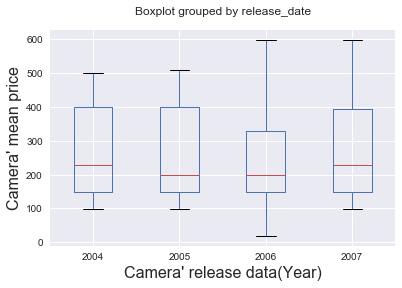

In [627]:
### 再次查看年份跟价格的关系变化
draw_box('price', ylabels='Camera\' mean price')

- 可以看到价格是随着每年的增长而增加的。

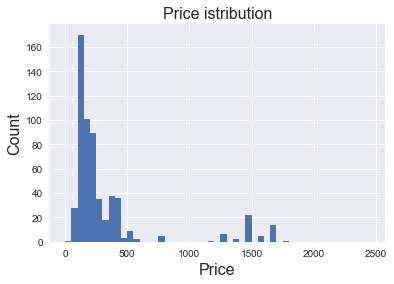

In [628]:
### 再来看看价格的分布是怎样的

camera.price.hist(bins=range(0, 2500, 50));
plt.title('Price istribution', fontsize=16)
plt.xlabel('Price', fontsize=16)
plt.ylabel('Count', fontsize=16);

- 通过查看相机价格的分布，我们可以发现相机的价格大多在500以内。
- 因为数据集并不大，所以如有条件应该使用更大的数据集来验证这一结果。

### 2.相机存储容量的分布，尺寸规格和出厂日期有关系，如果有关系它们是什么样的趋势？

In [631]:
def print_value(s, value):
    print('Camera\'s storage {} value is {}'.format(s, value))

In [637]:
### 拿到相机容量的众值
print_value('mode', camera.storage_included.mode().values[0])

### 拿到相机容量的最大值
print_value('max', camera.storage_included.max())

### 拿到相机容量的最小值
print_value('min', camera.storage_included.min())

Camera's storage mode value is 16.0
Camera's storage max value is 450.0
Camera's storage min value is 0.0


- 通过比较相机容量的众值，最大值和最小值发现，相机容量有异常值，因为我们知道相机容量都是2的几次幕这样的大小，所以最大值是异常值。

In [640]:
def two_power(x):
    """函数通过传值返回2的幂次方"""
    result = int(x) & (int(x)-1)
    if (result == 0 and x >= 2):
        return x
    else:
        return np.nan

In [641]:
### 查看相机容量可能的值
storage_maybe = np.sort(camera.storage_included.unique())
print(storage_maybe)

### 排除不可能存在的异常值
storage_data = camera.storage_included.apply(two_power).dropna()

[   0.    2.    6.    7.    8.    9.   10.   11.   12.   13.   14.   15.
   16.   17.   18.   19.   20.   21.   22.   23.   24.   25.   26.   27.
   28.   31.   32.   45.   47.   48.   50.   52.   54.   56.   58.   64.
  128.  173.  256.  450.]


- 因为相机容量的大小我们知道它是2的幂次方，所以如上看到很多异常值，所以需要进行清理。

In [642]:
### 再次查看相机容量可能的值
storage_maybe = np.sort(storage_data.unique())
print(storage_maybe)

[   2.    8.   16.   32.   64.  128.  256.]


In [643]:
### 得到相机容量新的数据集
storage_data = storage_data

storage_level
(0, 8]         19
(8, 16]       128
(16, 32]      116
(32, 64]        4
(64, 128]       1
(128, 512]      2
Name: storage_level, dtype: int64


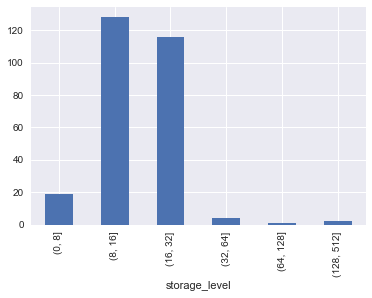

In [644]:
### 给相机容量设置一个分组
bins = [0, 8, 16, 32, 64, 128, 512]
camera['storage_level'] = pd.cut(storage_data, bins)

### 以图形的形式显示相机新数据的分布
storage_level_group = camera.groupby('storage_level').storage_level.count()
print(storage_level_group)
storage_level_group.plot(kind='bar');

- 通过分析和清理数据，可以看到相机的容量大多集中在32G以内，通过这个数据可以说，在2007年之前这段时间里，大多数的相机还不具备大容量的能力。
- 但是也可以看到这里的数据量并不大，如果可能的话应该通过更大的数据集来验证这一结果。

D:\Python\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


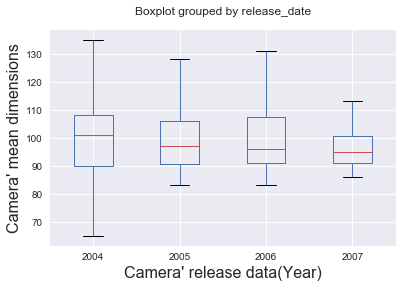

In [645]:
### 接着来看出厂日期跟尺寸规格的关系变化
draw_box('dimensions', ylabels='Camera\' mean dimensions')

- 从图表中看到相机的尺寸规格是一个下降的趋势，这充分说明了技术的不断进步，相机就会越来越小，方便人们携带

<a id='conclusions'></a>
## 结论

- 数据集一共有7个缺失值，因为量不大所以对缺失值的处理方式是直接删除了，为了方便把一些不用的字段也进行了删除操作。
- 当操作时发现有些年份的数据量太少，不足以说明问题，所以把2003年以前数据量小于100的数据也进行了清理操作。
- 通过图表的结果来看，相机的价格是呈现出上升的趋势的，而在去过这几年价格主要是在500以内。
- 相机的容量通过清理一些异常值之后，发现在过去几年相机容量是在32G以内，而相机的尺寸在逐年减小，这说明技术是在不断进步的

In [646]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295